Enter picture name: test.jpg
Number of k-clusters: 5
Image's size:  (4032, 3024, 3)
Number of k-clusters:  5
Enter picture name to save: test.png
Choose the format to save (PNG, JPG, PDF): png


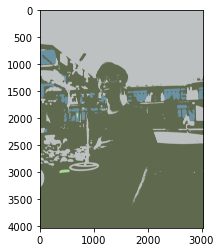

In [70]:
'''
Name: Lai Minh Thong
Student ID: 20127635

K-means image segmentation
'''

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import linalg




def initialize_centroids(k, img_1d):
    n_dims = k, img_1d.shape[1]
    
    centroids = np.random.uniform(255, 0, n_dims)

    return centroids

def assign_centroid_errors(centroids, img_1d):
    #Calculate square Euclidean distances for each centroid
    distance = np.sum((img_1d[:, None] - centroids)**2, axis = 2)
    
    labels = np.argmin(distance, axis = 1)
    centroid_errors = np.amin(distance, axis = 1)
    
    return (labels, centroid_errors)

def update_centroids(img_1d, labels, K):
    centroids = np.zeros((K, img_1d.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        img_1d_k = img_1d[labels == k]
        
        # take average
        centroids[k] = np.mean(img_1d_k, axis = 0)
    return centroids

#K-means algorithm
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    
    centroids = initialize_centroids(k_clusters, img_1d)
    errors = np.array([0])
    labels = np.array([])
    compr = True
    i = 0
    
    #main loop
    while(compr and i < max_iter):
        # Obtain centroids and error
        labels, centroid_errors = assign_centroid_errors(centroids, img_1d)
        np.append(errors, sum(centroid_errors))
        
        # Recalculate centroids
        centroids = update_centroids(img_1d, labels, k_clusters)

        # Check if the error has decreased
        if(round(errors[i],3) !=  round(errors[i-1],3)):
            compr = True
        else:
            compr = False
            
        i = i + 1
        
    centroids = centroids.astype(np.uint8)
    return (centroids, labels)

def generate_image(fmat, imName, image):
    if fmat == "PNG":
        Image.fromarray(image).save(imName + ".png")
    elif fmat == "JPG":
        Image.fromarray(image).save(imName + ".jpg")
    else:
        Image.fromarray(image).save(imName + ".pdf")

#Main function
def main():
    imName = input("Enter picture name: ")
    image = Image.open(imName, 'r')
#     image = Image.open("test.jpg", 'r')

    # Convert into np.array
    image_np = np.array(image)
    dim = image_np.shape
    
    #flatten image into 1d and reshape into an array of pixels elements
    image_np = image_np.flatten()
    image_np = image_np.reshape(int(image_np.shape[0]/3), 3)
    
    #K-means algorithm
    k = int(input("Number of k-clusters: "))
    centroids, labels = kmeans(image_np, k, 100)
    
    #Converted image
    kmeans_image = centroids[labels]

#     image_np = image_np.reshape(dim)
#     plt.imshow(image_np)

    #Reshape back into image's dimension 
    kmeans_image = kmeans_image.reshape(dim)
    
    
    print("Image's size: ", kmeans_image.shape)
    print("Number of k-clusters: ", k)
    plt.imshow(kmeans_image)
    
    
    #Save image
    imName = input("Enter picture name to save: ")
    
    fmat = ""
    while fmat.upper() not in ["PNG" ,"JPG" ,"PDF"]:
        fmat = input("Choose the format to save (PNG, JPG, PDF): ")
    
    generate_image(fmat, imName, kmeans_image)
    
            
            
main()